**imoort needed packages**

In [ ]:
import numpy as np
import random
import os
import pickle
import sys
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**base data augmentation**

In [ ]:
namesc = 'cards_tot.npy' #load original data(540,256,672 nparray)
original_c = np.load(namesc)

namels = 'seeds_tot.npy' #load seed labels (540,)
original_ls = np.load(namels)

nameln = 'num_tot.npy' #load num labels (540,)
original_ln = np.load(nameln)


cards_reshaped = np.reshape(original_c,(len(original_c), original_c.shape[1], original_c.shape[2], 1)) #reshape for imagedatagen

labels = np.concatenate([original_ls.reshape(-1, 1), original_ln.reshape(-1, 1)], axis=1)

data_batches = np.array_split(cards_reshaped, 10) #divide data into batches to avoid RAM issues

label_batches = np.array_split(labels, 10)


datagen = ImageDataGenerator(
    rotation_range=1,
    width_shift_range=0.005,
    height_shift_range=0,
    zoom_range=0.1,
    horizontal_flip=False,
    vertical_flip=False,
    shear_range=0.02
)

data_tot = [] #list to contain augmented data
labels_tot = []

for i in range(len(label_batches)):
    data_list = [] #create lists for single batches of data and append them to the main list
    data_tot.append(data_list)
    labels_list = []
    labels_tot.append(labels_list)

# generate augmented data and labels using flow()
    for X_batch, y_batch in datagen.flow(data_batches[i], label_batches[i], batch_size=len(data_batches[i])):
      data_list.append(X_batch.reshape(-1, data_batches[i].shape[1], data_batches[i].shape[2],1))
      labels_list.append(y_batch)
      if len(data_list) == 6:  # generate 6 augmented samples for each original one
          break

# concatenate the original data and labels with the augmented data and labels
    data_tot[i] = np.concatenate([data_batches[i]] + data_list, axis=0)
    labels_tot[i] = np.concatenate([label_batches[i]] + labels_list, axis=0)


**save augmented data and labels**

In [ ]:
for i in range(len(data_tot)):

  data_augmented = data_tot[i] #access batches of augmented data
  data_augmented = np.squeeze(data_augmented) #remove additional dim that imagedatagen needs

  basename = 'cards_aug{}.npy' #save data with different names
  filename = basename.format(i+1)
  np.save(filename, data_augmented)

  labels_augmented = labels_tot[i] #retrieve aug. labels
  labels1_augmented, labels2_augmented = np.split(labels_augmented, 2, axis=1) #separate the labels

  labels_s = np.squeeze(labels1_augmented) #remove additional dim.
  labels_n = np.squeeze(labels2_augmented)

  basename1 = 'labs_aug{}.npy' #save seeds labels
  filename1 = basename1.format(i+1)
  np.save(filename1, labels_s)

  basename2 = 'labn_aug{}.npy' #save number labels
  filename2 = basename2.format(i+1)
  np.save(filename2, labels_n)

  lowres_c = np.zeros((len(data_augmented), 128, 336)) #(378,128,336) empty array for low res images

  for j in range(len(data_augmented)): #lowres images
    image=data_augmented[j]

    filtered_image = gaussian_filter(image, sigma=2) #apply gaussian filter
    downsampled_image = filtered_image[::2, ::2] #reduce res by 1/4

    lowres_c[j] = downsampled_image #stack low res data

  np.save('card_aug_lr{}.npy'.format(i+1),lowres_c)  #save low res data


**display random augmented data samples**

[62.70327759 62.         61.99935532 61.97388077 62.47029877 62.15462112
 63.09353638 61.88814926 61.98369598 62.         62.         61.99923325
 62.96517944 61.98580551 61.77364349 61.96986389 61.98200989 62.6738472
 61.79647446 61.98681259 62.74139023 63.         61.9818573  62.89083481
 61.99677277 62.         63.         61.96084595 61.95048141 62.21766663
 61.94717026 61.9705925  63.         62.         61.94754028 62.64683914
 61.9432373  62.62993622 62.25922775 62.83450699]
[31.28213882 29.34458923 31.00184059 30.         29.26376152 31.30010605
 32.         29.18036842 30.         31.06572723 31.         31.
 32.         29.18869209 29.18832779 29.58589172 29.25152016 29.16517448
 29.24903107 30.         31.15579414 29.         29.14021111 31.48521805
 29.06623077 31.44543457 30.         29.52534103 30.         29.48847389
 32.         29.56552696 31.         29.33127594 31.12396812 32.
 29.35336494 31.23307419 31.3368206  31.05919266]


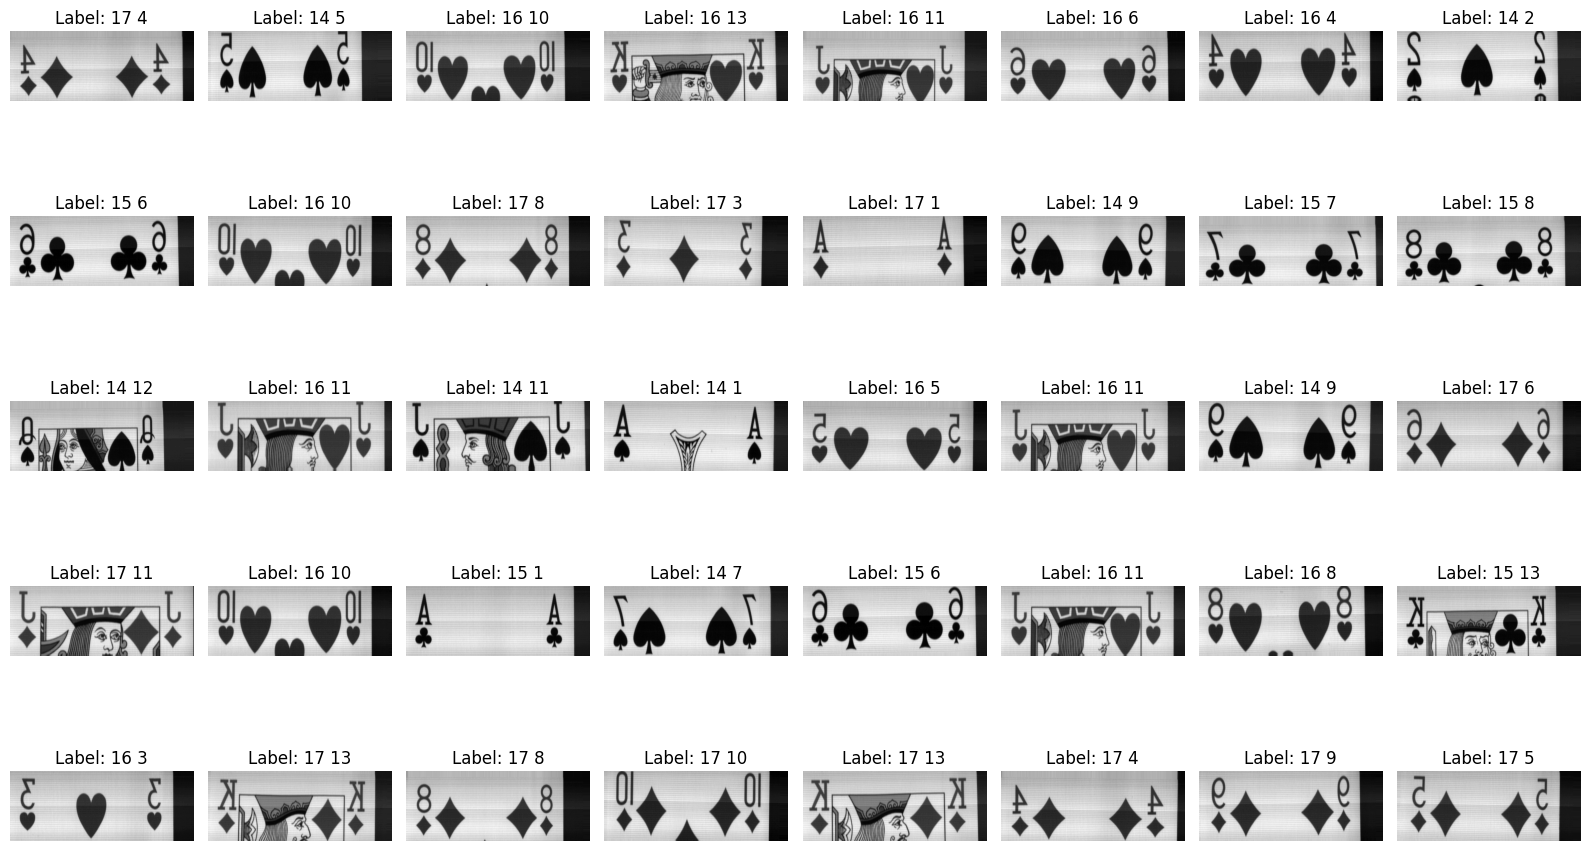

In [ ]:
prova1=np.load('cards_aug10.npy') #load data and labels
provals1=np.load('labs_aug10.npy')
provals2=np.load('labn_aug10.npy')

idx = random.sample(range(prova1.shape[0]), 40) #select 40 random samples

samples =prova1[idx]
lab_s = provals1[idx]
lab_n = provals2[idx]


max_values = np.max(samples, axis=(1,2)) #plot max and min values of data to understand ranges
min_values = np.min(samples, axis=(1,2))
print(max_values)
print(min_values)


fig, axs = plt.subplots(5, 8, figsize=(16, 10)) # plot the samples with their labels
for i, ax in enumerate(axs.flatten()):
    ax.imshow(samples[i], cmap='gray')
    label = str(lab_s[i]) + " " + str(lab_n[i])
    ax.set_title(f"Label: {label}")
    ax.axis('off')
plt.tight_layout()
plt.show()

**display random low res data samples**

[60.29394408 60.49250292 60.49637536 60.25852476 60.495678   60.32564331
 60.41565923 59.97093634 60.50595144 60.55211981 60.09890361 60.47000884
 60.16646045 60.04103105 60.70201634 60.81442907 60.82582292 60.59945472
 60.33944051 60.27730836 60.18785168 60.53793485 60.35480838 60.19609162
 60.31236865 60.26470371 60.5945314  60.16554787 60.36832844 60.48287087
 60.28514812 60.91394872 60.2721851  60.43908694 60.16672078 60.26110892
 60.41975001 60.42102103 60.40081427 60.49449759]
[31.3516175  30.00658827 30.05029132 29.96421569 30.21013819 32.
 30.02201535 30.02757877 29.92893092 30.00000004 29.97691019 30.10999339
 29.97716829 35.8096627  30.03312815 30.0428199  30.10671388 30.03342096
 32.00960133 32.04119343 30.06210685 32.44739811 31.98633266 30.03311639
 30.0076964  29.96773976 30.01759897 29.75780791 30.02265792 32.05190441
 32.04912066 30.19840899 30.02527132 32.         30.02110074 32.00070743
 29.94186973 32.61950989 29.9274179  35.28047811]


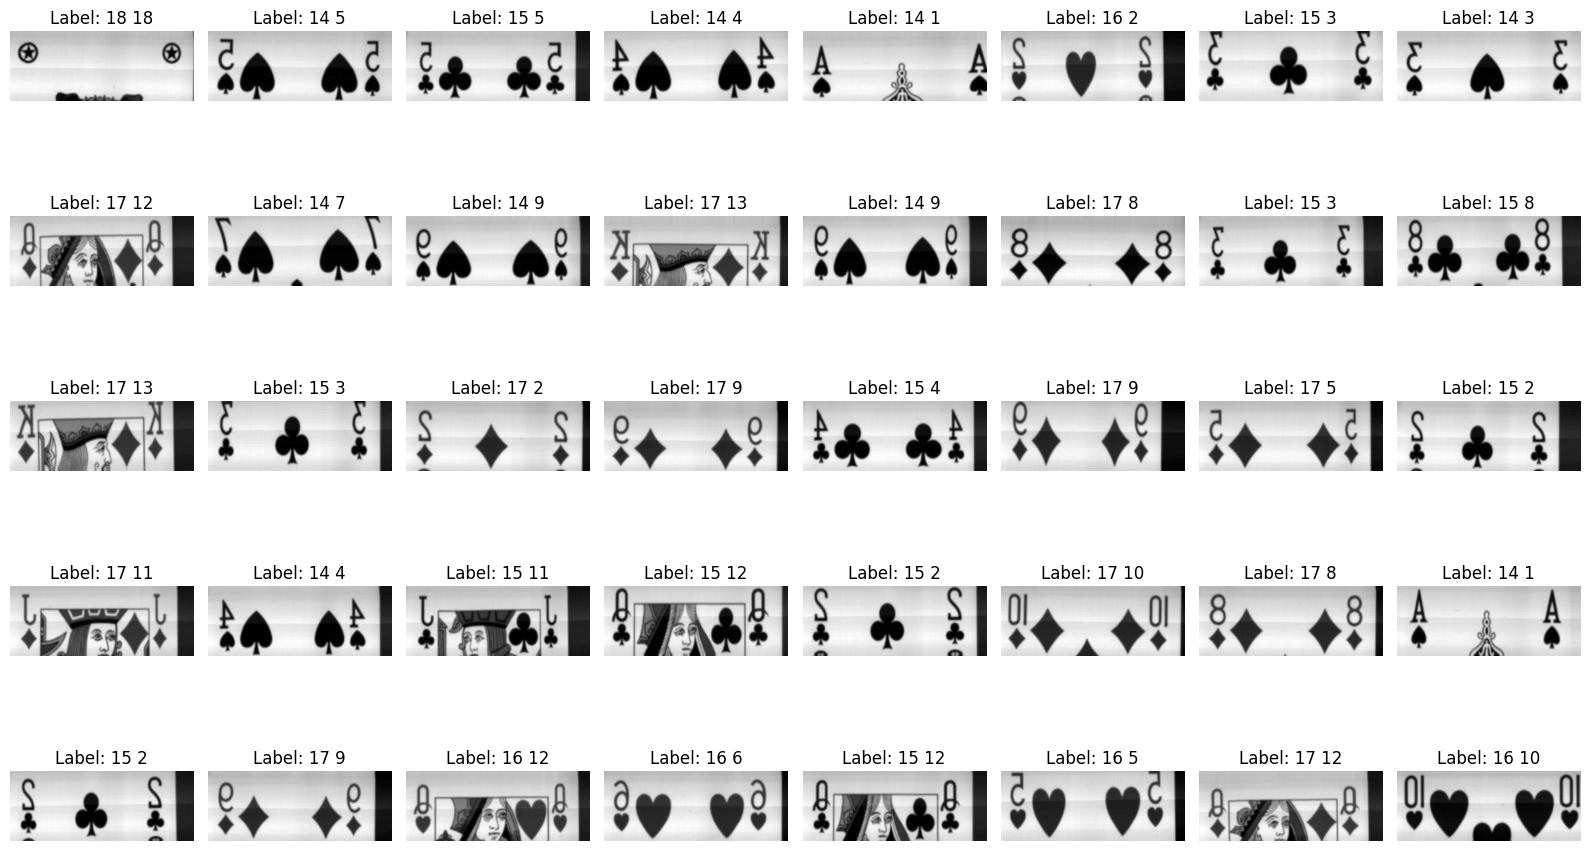

In [ ]:
prova2=np.load('card_aug_lr2.npy') #load data and labels
prova2s1=np.load('labs_aug2.npy')
prova2s2=np.load('labn_aug2.npy')

idx2 = random.sample(range(prova2.shape[0]), 40) #select 40 random samples

samples2 =prova2[idx2]
lab_s2 = prova2s1[idx2]
lab_n2 = prova2s2[idx2]


max_values = np.max(samples2, axis=(1,2)) #plot max and min values of data to understand ranges
min_values = np.min(samples2, axis=(1,2))
print(max_values)
print(min_values)


fig, axs = plt.subplots(5, 8, figsize=(16, 10)) # plot the samples with their labels
for i, ax in enumerate(axs.flatten()):
    ax.imshow(samples2[i], cmap='gray')
    label = str(lab_s2[i]) + " " + str(lab_n2[i])
    ax.set_title(f"Label: {label}")
    ax.axis('off')
plt.tight_layout()
plt.show()

**normalize data and turn it into b&w**

In [ ]:
bw_cards = []
threshold = 0.5 #pixels with a value higher than this become white

for i in range(1,11):
  file_name = f"card_aug_lr{i}.npy" #load lowres data
  lr_cards = np.load(file_name)

  arr_min = np.min(lr_cards, axis=(1, 2), keepdims=True) #normalize data between (0,1)
  arr_max = np.max(lr_cards, axis=(1, 2), keepdims=True)
  arr_normalized = (lr_cards - arr_min) / (arr_max - arr_min)

  arr_bw = np.where(arr_normalized > threshold, 1, 0) #turn data into b&w
  bw_cards.append(arr_bw)

  save_name = f"card_bw{i}.npy" #save b&w data
  np.save(save_name,arr_bw)



**display random b&w data samples**

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


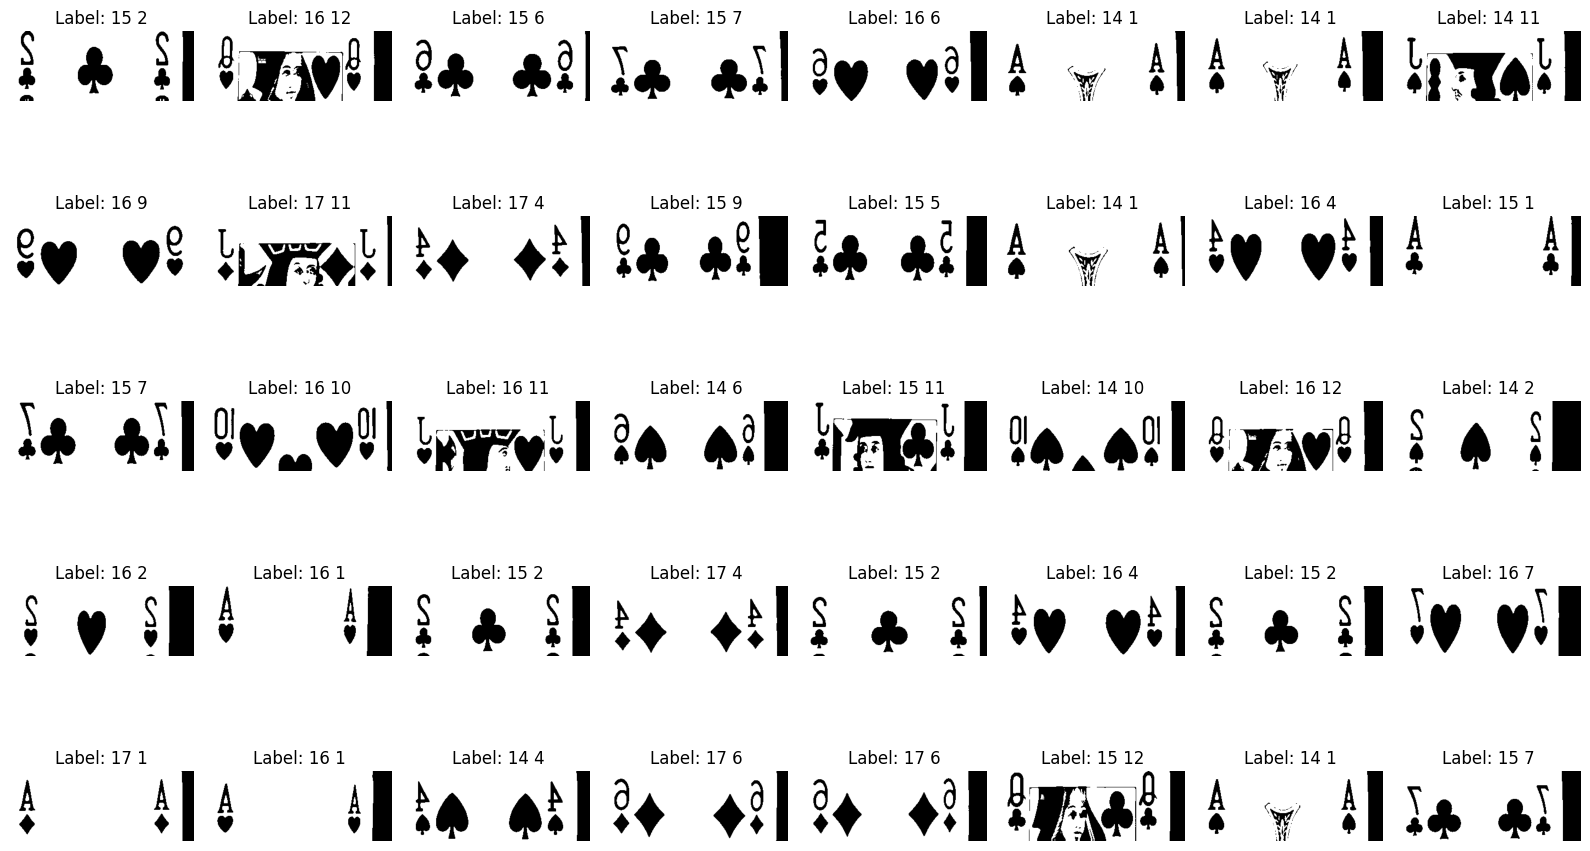

In [ ]:
prova1=np.load('card_bw10.npy') #load data and labels
provals1=np.load('labs_aug10.npy')
provals2=np.load('labn_aug10.npy')

idx = random.sample(range(prova1.shape[0]), 40) #select 40 random samples

samples =prova1[idx]
lab_s = provals1[idx]
lab_n = provals2[idx]


max_values = np.max(samples, axis=(1,2)) #plot max and min values of data to understand ranges
min_values = np.min(samples, axis=(1,2))
print(max_values)
print(min_values)


fig, axs = plt.subplots(5, 8, figsize=(16, 10)) # plot the samples with their labels
for i, ax in enumerate(axs.flatten()):
    ax.imshow(samples[i], cmap='gray')
    label = str(lab_s[i]) + " " + str(lab_n[i])
    ax.set_title(f"Label: {label}")
    ax.axis('off')
plt.tight_layout()
plt.show()